<a href="https://colab.research.google.com/github/rkgupta7463/Computer-Visions-Projects/blob/main/Plant_vs_Human_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
directory=os.path.join('/content/drive/MyDrive/Plant-Leaf_Human_Detection/Data')
train_dir=os.path.join(directory,'train')
test_dir=os.path.join(directory,'test')

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='binary',  # Set the class mode for multi-class classification
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 203 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary',
    shuffle=False,  # Don't shuffle the test data
    seed=seed
)

Found 71 images belonging to 2 classes.


In [ ]:
train_generator.class_indices,test_generator.class_indices

({'human_face': 0, 'plants_leaf': 1}, {'human_face': 0, 'plants_leaf': 1})

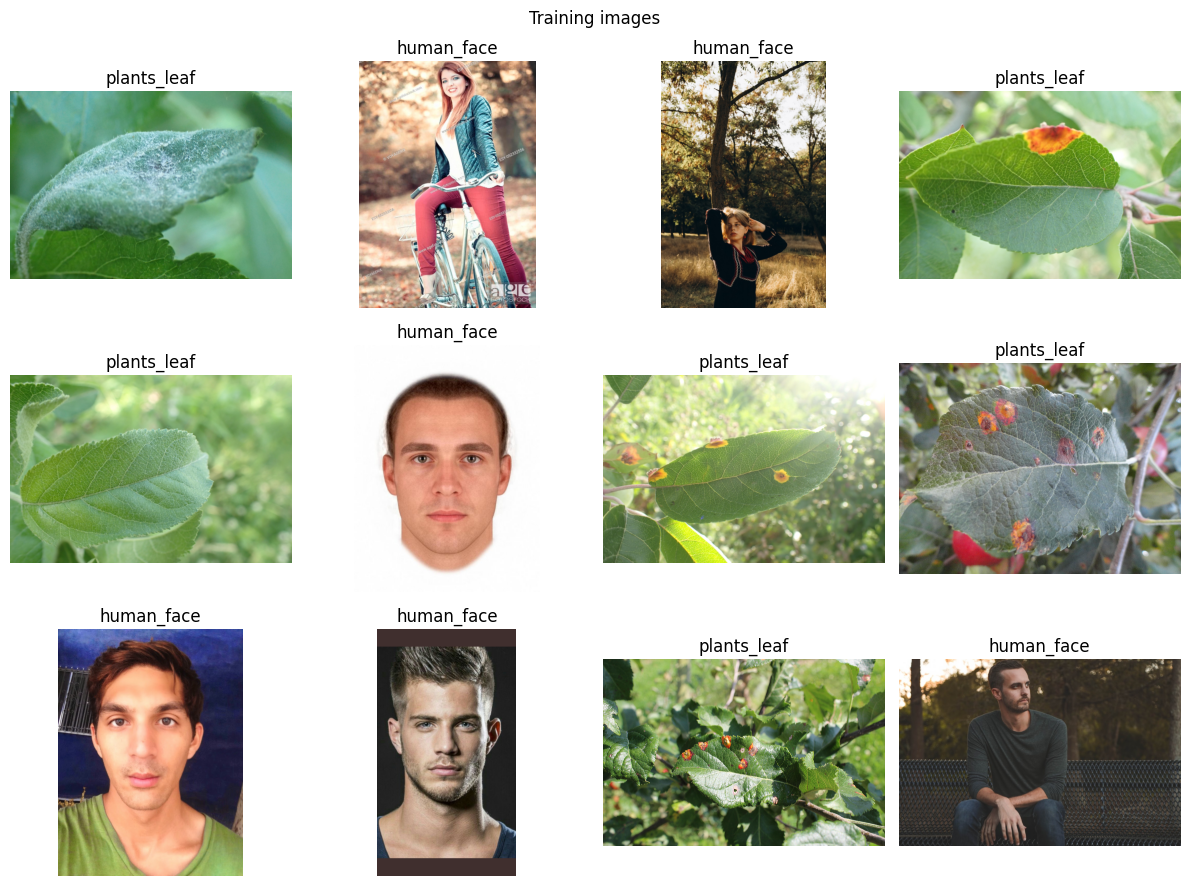

In [ ]:
import random
from PIL import Image


filenames = train_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = train_dir+ "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.suptitle("Training images")
plt.tight_layout()
plt.show()

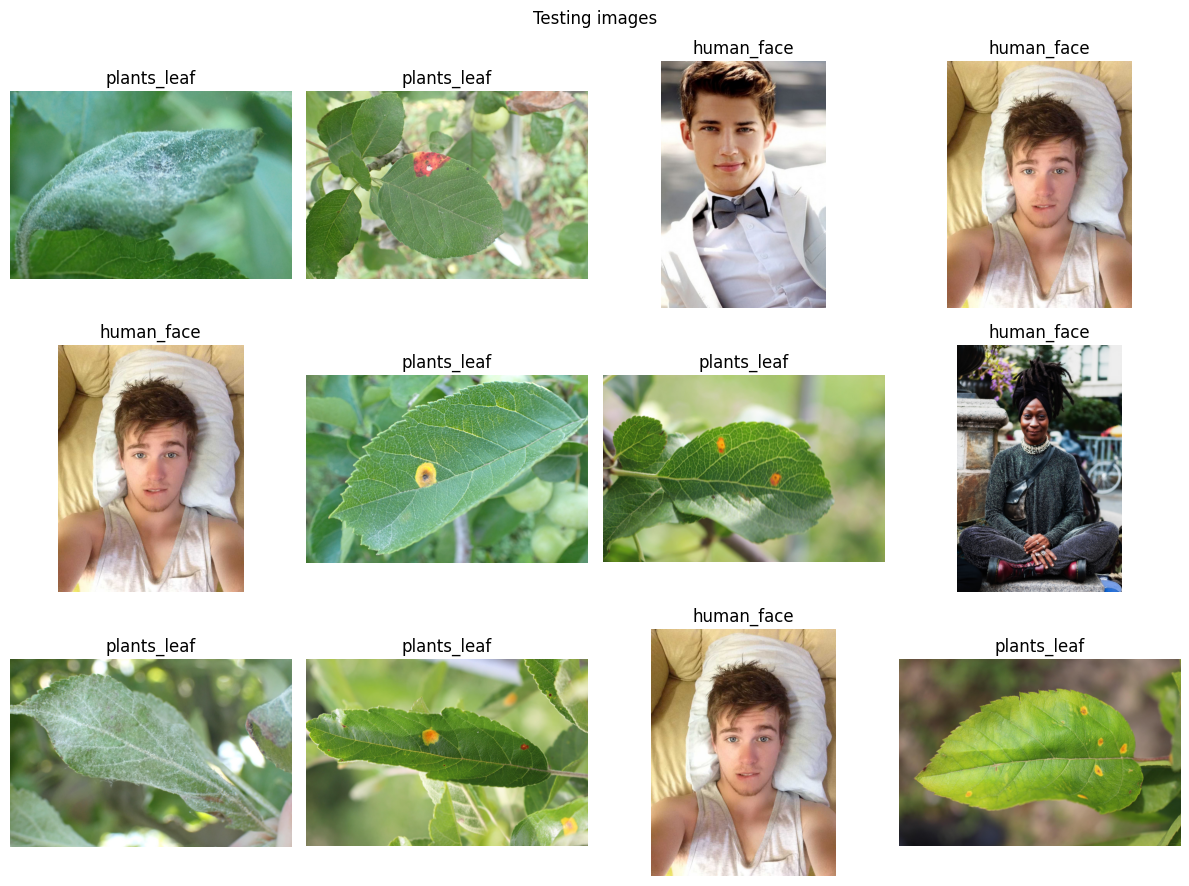

In [ ]:
filenames = test_generator.filenames

# Randomly select 12 filenames (matching the 3x4 grid)
sampled_filenames = random.sample(filenames, 12)

rows, cols = 3, 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))

for i, filename in enumerate(sampled_filenames):
    # Split the filename by the "/"
    parts = filename.split("/")

    # Take the first part of the split filename
    first_part = parts[0]

    # Combine the directory path with the first part
    image_path = test_dir+ "/" + filename

    # Load the image using PIL
    image = Image.open(image_path)

    # Determine the row and column for the current image
    row = i // cols
    col = i % cols

    # Display the image in the specified row and column
    axes[row, col].imshow(image)

    # Set the title to the first part of the filename
    axes[row, col].set_title(first_part)
    axes[row, col].axis('off')

plt.suptitle("Testing images")
plt.tight_layout()
plt.show()

### Now lets start creating CNN Network with some Pre-Trained Model also

In [ ]:
# Define the CNN model
def create_cnn_model(optimizers,losses):
    model = Sequential()

    # Convolutional layers
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255,255,3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Flatten layer to transition from convolutional to dense layers
    model.add(keras.layers.Flatten())

    # Dense layers
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))  # Dropout for regularization
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer=optimizers, loss=losses, metrics=['accuracy'])

    # Display the model summary
    model.summary()
    return model

In [ ]:
# Create the model
model = create_cnn_model(Adam(),"binary_crossentropy")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Adjust as needed
    validation_data=test_generator,
    batch_size=64
)

Epoch 1/20
7/7 [==============================] - 61s 8s/step - loss: 1.1944 - accuracy: 0.4975 - val_loss: 0.6509 - val_accuracy: 0.4930
Epoch 2/20
7/7 [==============================] - 60s 8s/step - loss: 0.6177 - accuracy: 0.5665 - val_loss: 0.4160 - val_accuracy: 0.9437
Epoch 3/20
7/7 [==============================] - 59s 9s/step - loss: 0.2772 - accuracy: 0.9360 - val_loss: 0.1370 - val_accuracy: 0.9718
Epoch 4/20
7/7 [==============================] - 60s 9s/step - loss: 0.1454 - accuracy: 0.9458 - val_loss: 0.1532 - val_accuracy: 0.9577
Epoch 5/20
7/7 [==============================] - 62s 9s/step - loss: 0.3152 - accuracy: 0.9163 - val_loss: 0.4793 - val_accuracy: 0.8028
Epoch 6/20
7/7 [==============================] - 58s 8s/step - loss: 0.4000 - accuracy: 0.8276 - val_loss: 0.7528 - val_accuracy: 0.7183
Epoch 7/20
7/7 [==============================] - 60s 8s/step - loss: 0.1716 - accuracy: 0.9261 - val_loss: 0.1281 - val_accuracy: 0.9577
Epoch 8/20
7/7 [==================

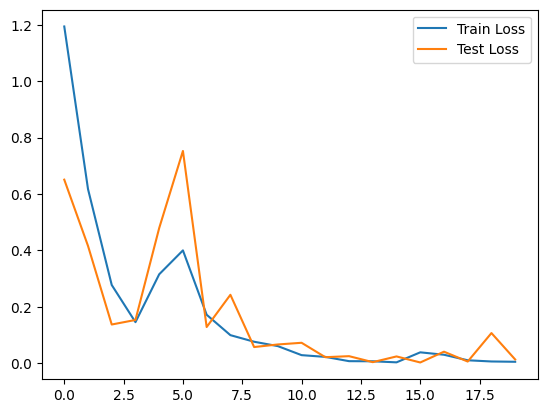

In [ ]:
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'],label="Test Loss")
plt.legend()
plt.show()

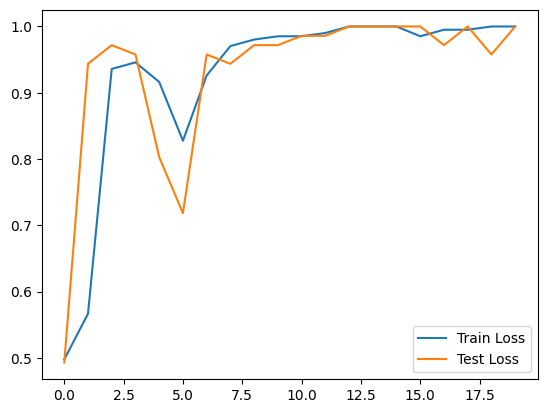

In [ ]:
plt.plot(history.history['accuracy'],label="Train Loss")
plt.plot(history.history['val_accuracy'],label="Test Loss")
plt.legend()
plt.show()

In [ ]:
l,acc=model.evaluate(test_generator)

3/3 [==============================] - 9s 2s/step - loss: 0.0129 - accuracy: 1.0000


In [22]:
print(f"Loss of test data: {l}")
print(f"Accuracy of test data: {acc}")

Loss of test data: 0.012927448377013206
Accuracy of test data: 1.0


In [ ]:
model.save("plant_human_model.h5")

In [100]:
def prediction_class(img_url,model,img_size):
  img_test_3=Image.open(img_url)
  plt.imshow(img_test_3)
  img_test_resized_3=img_test_3.resize(img_size)
  targeted_img_3=keras.preprocessing.image.img_to_array(img_test_resized_3)
  targeted_img_3 = np.expand_dims(targeted_img_3, axis=0)
  reslut_3=model.predict(targeted_img_3)

  class_name={0 : 'human', 1 : 'plants_leaf'}
  arr = np.array(reslut_3)
  idx=arr[0,0]
  class_pred=class_name[np.abs(idx)]
  context={"predicted Value" : reslut_3, "Predicted class name:": class_pred}
  return context

1/1 [==============================] - 0s 65ms/step


{'predicted Value': array([[0.]], dtype=float32),
 'Predicted class name:': 'human'}

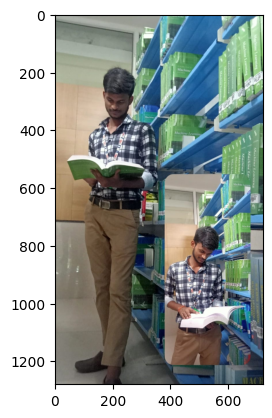

In [101]:
prediction_class("/content/WhatsApp Image 2023-11-23 at 7.30.41 PM.jpeg",model,(255,255))

1/1 [==============================] - 0s 66ms/step


{'predicted Value': array([[1.]], dtype=float32),
 'Predicted class name:': 'plants_leaf'}

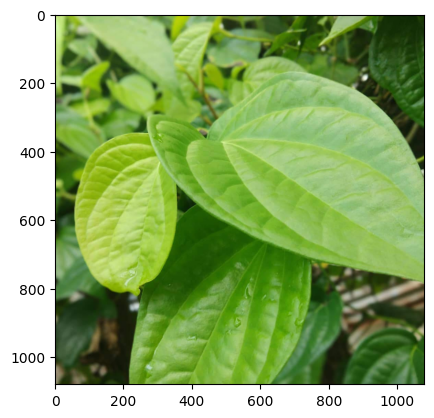

In [102]:
prediction_class("/content/61sWhGZ5waL.jpg",model,(255,255))

1/1 [==============================] - 0s 76ms/step


{'predicted Value': array([[1.]], dtype=float32),
 'Predicted class name:': 'plants_leaf'}

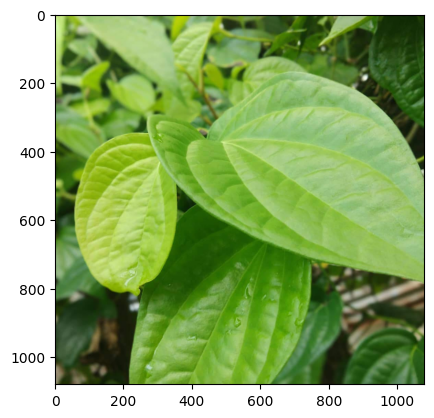

In [103]:
prediction_class("/content/61sWhGZ5waL.jpg",model,(255,255))

1/1 [==============================] - 0s 102ms/step


{'predicted Value': array([[0.]], dtype=float32),
 'Predicted class name:': 'human'}

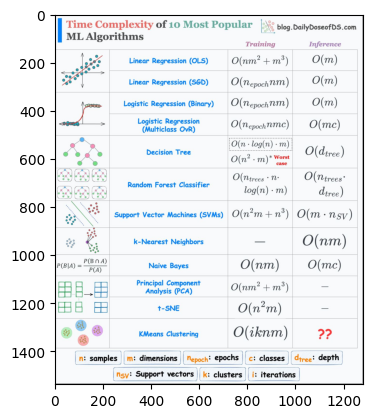

In [104]:
prediction_class("/content/ML Time complexity.jpg",model,(255,255))

1/1 [==============================] - 0s 66ms/step


{'predicted Value': array([[1.]], dtype=float32),
 'Predicted class name:': 'plants_leaf'}

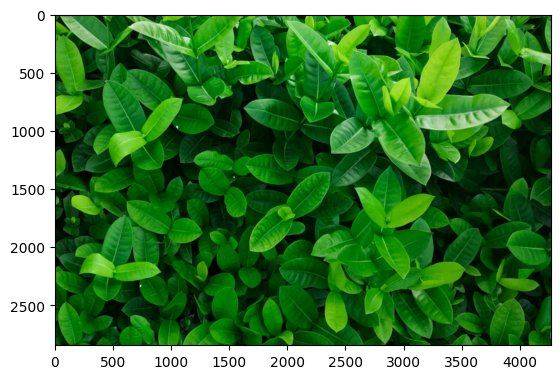

In [105]:
prediction_class("types-of-leaf-arrangements-3269814-03-a6b9b4775c5b47b79e14aed9a7e6ac90.jpg",model,(255,255))

1/1 [==============================] - 0s 106ms/step


{'predicted Value': array([[0.]], dtype=float32),
 'Predicted class name:': 'human'}

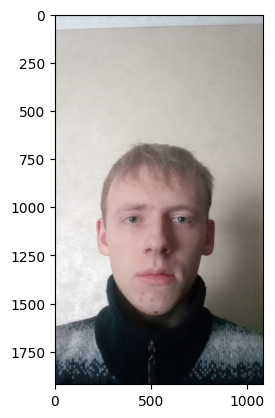

In [108]:
prediction_class("20.jpg",model,(255,255))